## Translate Wikidata objects and upload with QuickStatements 3.0 

* https://github.com/salgo60/Stockholm_Archipelago_Trail/issues/104
* Test all Wikidata objects related to SAT Möja wd:Q133724252
* Count numer of SAT Möja objects has a label
  *  Bubble chart https://w.wiki/Ej3z
  *  Table https://w.wiki/Ej46
* SPARQL find labels missing for a list of labels https://w.wiki/Ej6c  

* Write code that generate the following languages en fr de nn nb it pl es pl pt ar ru zh fi da nl ja fa uk ku fit se sma smj sje sju rmy yi et lv lt cs hu el tr ko hi th vi he id ms is fo

In [1]:
SATsection = "SAT Furusund"
SATwdSection = "Q133724254" 
SATsection = "SAT Lidö"
SATwdSection = "Q133374185" 
SATsection = "SAT Ornö"
SATwdSection = "Q133724236"  
SATsection = "SAT Svartsö"   
SATwdSection = "Q133724239"    
SATsection = "SAT Ingmarsö"   
SATwdSection = "Q133724247"  
SATsection = "SAT Brottö"   
SATwdSection = "Q133724240"  
SATsection = "SAT Finnhamn"   
SATwdSection = "Q133724249"  
SATsection = "SAT Yxlan"   
SATwdSection = "Q133724250"    
SATsection = "SAT Furusund"   
SATwdSection = "Q133724254"    
SATsection = "SAT Arholma"   
SATwdSection = "Q133374147"    
SATsection = "SAT Grinda"   
SATwdSection = "Q133502246"    
#SATsection = "SAT Möja"   
#SATwdSection = "Q133724252"    
#SATsection = "SAT Sandhamn"   
#SATwdSection = "Q133724255"    
#SATsection = "SAT Runmarö"   
#SATwdSection = "Q133724246"    
#SATsection = "SAT Nämdö"   
#SATwdSection = "Q133554956"    
#SATsection = "SAT Ornö"   
#SATwdSection = "Q133724236"    
#SATsection = "SAT Fjärdlång"   
#SATwdSection = "Q133724237"    
#SATsection = "SAT Ålö"   
#SATwdSection = "Q133724232"    
#SATsection = "SAT Rånö"   
#SATwdSection = "Q133724231"    
#SATsection = "SAT Landsort"   
#SATwdSection = "Q133449160"    
#SATsection = "SAT Lidö"
#SATwdSection = "Q133374185" 
#SATsection = "SAT Utö"   
#SATwdSection = "Q133724234"    
SATsection = "SAT Sandhamn"   
SATwdSection = "Q133724255"    
SATsection = "All"   
SATwdSection = "Q131318799"    








In [2]:
from datetime import datetime
from SPARQLWrapper import SPARQLWrapper, JSON
import sys

def count_labels_by_language(SATsection="SAT Möja", SATwdSection="Q133724252"):
    """
    Counts the number of SAT trail objects of a given instance type that belong to a given SAT section
    and have labels, grouped by language.

    Parameters:
        SATsection (str): Name of the SAT section (for reference only)
        SATwdSection (str): Wikidata Q-ID of the SAT section (used in SPARQL query)
        instance_qid (str): Wikidata Q-ID of the object type (e.g., SAT trail item)

    Returns:
        List[Dict]: A list of dictionaries with keys 'lang' and 'count'
    """
    print (f"count_labels_by_language - params: {SATsection} / {SATwdSection}")
    endpoint_url = "https://query.wikidata.org/sparql"

    query = f"""
    SELECT ?lang (COUNT(?item) AS ?count) WHERE {{
      ?item wdt:P6104 wd:Q134294510 .
      #?item wdt:P2789 wd:{SATwdSection} .
      ?item rdfs:label ?label .
      BIND(LANG(?label) AS ?lang)
    }}
    GROUP BY ?lang
    ORDER BY DESC(?count)
    """

    user_agent = f"SAT-LabelCounter-{SATsection.replace(' ', '')}-Python/{sys.version_info[0]}.{sys.version_info[1]}"
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    return [
        {"lang": result["lang"]["value"], "count": int(result["count"]["value"])}
        for result in results["results"]["bindings"]
    ]


In [3]:
data = count_labels_by_language(
    SATsection=SATsection,
    SATwdSection=SATwdSection 
)


count_labels_by_language - params: All / Q131318799


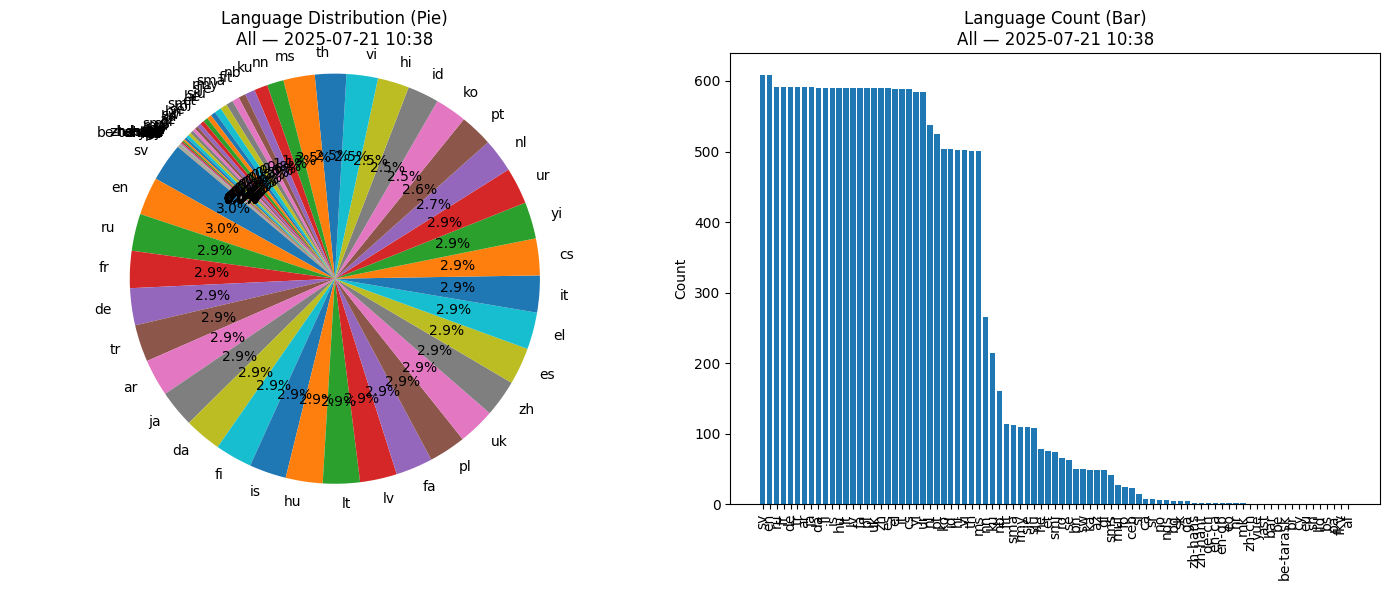

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime 
# Prepare data for plotting
labels = [entry["lang"] for entry in data]
sizes = [entry["count"] for entry in data]

# Current timestamp
today_str = datetime.now().strftime("%Y-%m-%d %H:%M")
title = f"{SATsection} — {today_str}"

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
ax1.set_title(f'Language Distribution (Pie)\n{title}')

# Bar chart
ax2.bar(labels, sizes)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels, rotation=90)
ax2.set_ylabel('Count')
ax2.set_title(f'Language Count (Bar)\n{title}')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from deep_translator import GoogleTranslator

## get supported languages  
langs_list = GoogleTranslator().get_supported_languages()  # output: [arabic, french, english etc...]
#langs_list

In [6]:
langs_dict = GoogleTranslator().get_supported_languages(as_dict=True)  # output: {arabic: ar, french: fr, english:en etc...}
#langs_dict

In [7]:
# see https://github.com/salgo60/Stockholm_Archipelago_Trail/issues/104#issuecomment-3070692372
def get_lang_code(GoogleLangCode):
    if GoogleLangCode == "zh":
        return "zh-CN"
    return GoogleLangCode


In [8]:
# https://github.com/salgo60/Stockholm_Archipelago_Trail/issues/104 
# "Test translate with use python deep_translator and create a QuickView file "
# 
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

today_str_filename = datetime.now().strftime("%Y-%m-%d_%H-%M")


endpoint_url = "https://query.wikidata.org/sparql"

query = f"""
SELECT ?langValue ?item ?Lsv ?Dsv WHERE {{
  VALUES ?langValue {{ "en" "fr" "de" "it" "pl" "es" "pt" "ar" "ru" "zh" "fi" 
                       "da" "nl" "ja" "fa" "uk" "lv" "lt" "cs" "hu" "el" "tr" "ko" 
                       "hi" "th" "vi" "id" "ms" "is" }}

  VALUES ?SATSection {{ wd:{SATwdSection} }}

  ?item wdt:P6104 wd:Q134294510 ;
        #wdt:P2789 ?SATSection ;
        rdfs:label ?Lsv ;
        schema:description ?Dsv .

  FILTER(LANG(?Lsv) = "sv")
  FILTER(LANG(?Dsv) = "sv")

  FILTER NOT EXISTS {{
    ?item rdfs:label ?missingLabel .
    FILTER(LANG(?missingLabel) = ?langValue)
  }}

  SERVICE wikibase:label {{ bd:serviceParam wikibase:language "sv,mul,en,de". }}
}}
ORDER BY ?item ?langValue
"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results = get_results(endpoint_url, query)
# Samla resultat
output_lines = []

from tqdm.notebook import tqdm
from deep_translator import GoogleTranslator

# Example variables (adjust as needed)
today_str_filename = datetime.now().strftime("%Y-%m-%d_%H%M")
output_lines = []

# Loop with progress bar
for result in tqdm(results["results"]["bindings"], desc="Translating", unit="item"):
    langValue = result["langValue"]["value"]
    wd = result["item"]["value"].replace("http://www.wikidata.org/entity/", "")
    Lsv = result["Lsv"]["value"]
    Dsv = result["Dsv"]["value"]
    
    targetLangValue = get_lang_code(langValue)
    
    try:
        label_trans = GoogleTranslator(source='sv', target=targetLangValue).translate(Lsv)
        desc_trans = GoogleTranslator(source='sv', target=targetLangValue).translate(Dsv)
        #print(f'{label_trans} / {desc_trans}')
        output_lines.append(f'{wd}|L{langValue}|"{label_trans}"')
        output_lines.append(f'{wd}|D{langValue}|"{desc_trans}"')
    except Exception as e:
        print(f"❌ Översättning misslyckades för {wd} till {langValue}: {e}")

# Save to file
output_filename = f"translated_labels_descriptions_{SATsection}_{today_str_filename}.txt"
with open(output_filename, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

print(f"✅ Klar! Resultatet är sparat i '{output_filename}'.")


Translating:   0%|          | 0/1009 [00:00<?, ?item/s]

❌ Översättning misslyckades för Q134777419 till th: Nåttarö bryggkiosk --> No translation was found using the current translator. Try another translator?
✅ Klar! Resultatet är sparat i 'translated_labels_descriptions_All_2025-07-21_1038.txt'.


### Next step run Quickstatement 
* https://qs-dev.toolforge.org/
* rerun stats



In [11]:
data = count_labels_by_language(
    SATsection=SATsection,
    SATwdSection=SATwdSection 
)

count_labels_by_language - params: All / Q131318799


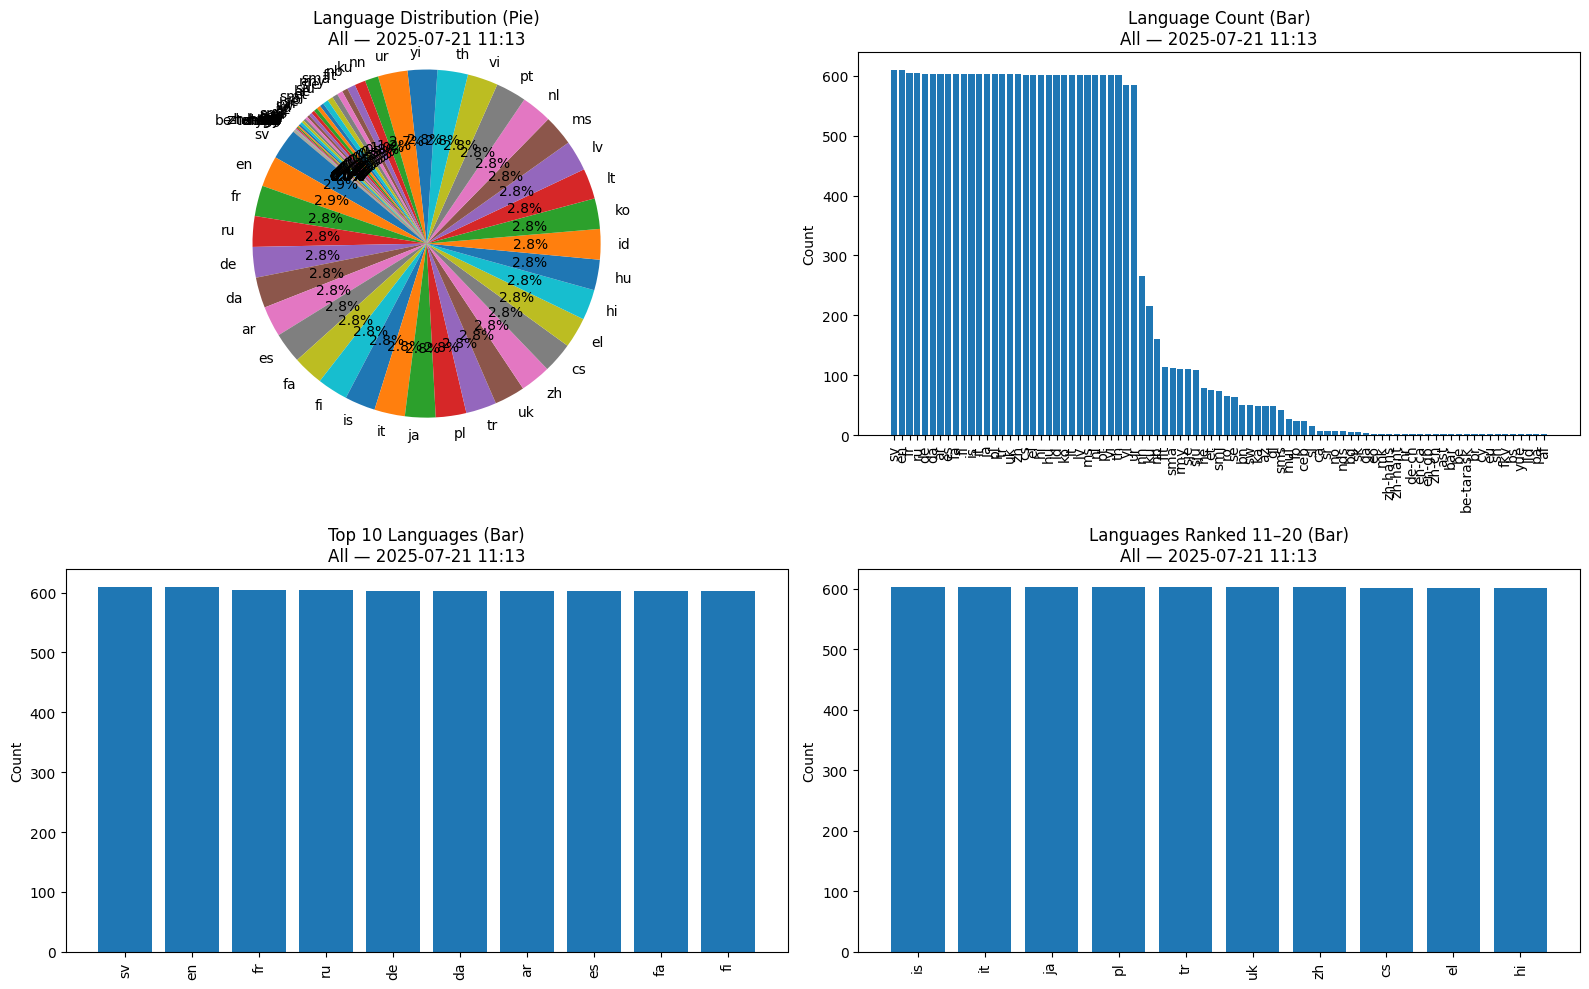

In [12]:
# Prepare data for plotting
labels = [entry["lang"] for entry in data]
sizes = [entry["count"] for entry in data]

# Current timestamp
today_str = datetime.now().strftime("%Y-%m-%d %H:%M")
title = f"{SATsection} — {today_str}"

# Sort data by count descending for top 10
sorted_data = sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True)
top10_labels, top10_sizes = zip(*sorted_data[:10]) 
next10_data = sorted_data[10:20]
next10_labels, next10_sizes = zip(*next10_data) if next10_data else ([], [])


fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Pie chart
ax1 = axs[0, 0]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')
ax1.set_title(f'Language Distribution (Pie)\n{title}')

# Full bar chart
ax2 = axs[0, 1]
ax2.bar(labels, sizes)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels, rotation=90)
ax2.set_ylabel('Count')
ax2.set_title(f'Language Count (Bar)\n{title}')

# Top 10 bar chart
ax3 = axs[1, 0]
ax3.bar(top10_labels, top10_sizes)
ax3.set_xticks(range(len(top10_labels)))
ax3.set_xticklabels(top10_labels, rotation=90)
ax3.set_ylabel('Count')
ax3.set_title(f'Top 10 Languages (Bar)\n{title}')

# 11–20 bar chart
ax4 = axs[1, 1]
if next10_labels:
    ax4.bar(next10_labels, next10_sizes)
    ax4.set_xticks(range(len(next10_labels)))
    ax4.set_xticklabels(next10_labels, rotation=90)
    ax4.set_ylabel('Count')
    ax4.set_title(f'Languages Ranked 11–20 (Bar)\n{title}')
else:
    ax4.axis('off')  # Hide if not enough data

plt.tight_layout()
plt.show()